The Traveling Salesperson Problem (TSP) is a classic combinatorial optimization problem in graph theory and operations research. It involves finding the shortest possible route that visits a given set of cities exactly once and returns to the starting point. TSP is NP-hard, meaning that no efficient algorithm is known for solving it optimally in all cases.

In its symmetric form, the distance (or cost) between any two cities is the same in both directions—i.e., the cost from city A to city B is equal to the cost from city B to city A. This contrasts with the asymmetric TSP, where travel costs may differ depending on direction.

### Mathematical Formulation (Symmetric TSP)

    min ∑(Ce * ye)   for each e ∈ E

    subject to:

    ∑(ye) = 2   for each v ∈ V, where e ∈ N(v)
    
    ∑(ye) ≤ |S| - 1   for each S ⊂ V, where 2 ≤ |S| ≤ |V| - 1

#### Description of Constraints:
- Since this is the symmetric version of the problem, the cost matrix is symmetric: Cij = Cji = Ce.
- The first constraint ensures that each city is part of exactly two edges: one as the departure city and one as the arrival city.
- The second constraint eliminates subtours, ensuring that the solution forms a Hamiltonian cycle—i.e., a tour that visits every city exactly once and returns to the starting point.

### Important Note:
The number of possible subtours in a TSP instance grows exponentially with the number of nodes. The total number of subtours is given by:

    ∑(N! / (M!(N-M)!))   for each M ∈ [2, N-1]

where N is the total number of cities, and M represents the length of a possible subtour.


In [6]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
from scipy.spatial.distance import pdist, squareform

In [15]:
np.random.seed(0)
num_towns = 6
towns = list(range(num_towns))
coords = np.random.randn(num_towns,2)
distances = pdist(coords, metric='euclidean')
edges = list(combinations(towns, r=2))
distances_dict = {edge: distance for edge, distance in zip(edges, distances)}

distances_dict

{(0, 1): 2.001256514017904,
 (0, 2): 1.3813185152970122,
 (0, 3): 0.9832117923388141,
 (0, 4): 1.8673003900283605,
 (0, 5): 1.9327673428056962,
 (1, 2): 3.3386563311244952,
 (1, 3): 2.392421954807535,
 (1, 4): 2.1261724468110734,
 (1, 5): 1.1469460768574657,
 (2, 3): 1.2344615718735805,
 (2, 4): 2.410427806830188,
 (2, 5): 2.980426831731294,
 (3, 4): 1.1938385250390793,
 (3, 5): 1.7965963063915087,
 (4, 5): 1.072565252988555}

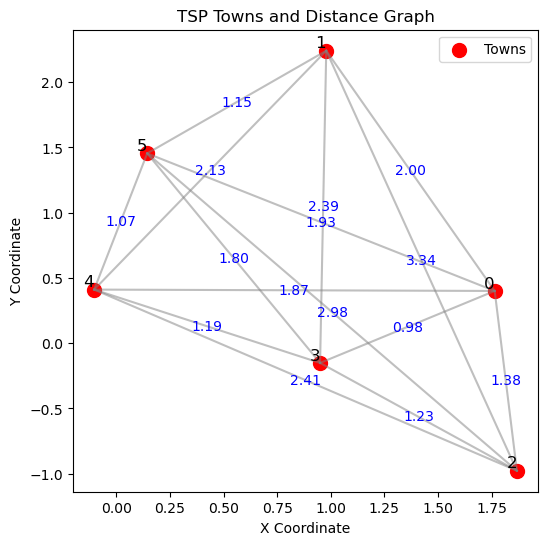

In [16]:
# Convert to a full distance matrix
distance_matrix = squareform(distances)

# Plot towns
plt.figure(figsize=(6, 6))
plt.scatter(coords[:, 0], coords[:, 1], color='red', s=100, label='Towns')

# Annotate town numbers
for i, (x, y) in enumerate(coords):
    plt.text(x, y, f"{i}", fontsize=12, ha='right', va='bottom', color='black')

# Plot edges with distances
for (i, j), dist in distances_dict.items():
    x_values = [coords[i, 0], coords[j, 0]]
    y_values = [coords[i, 1], coords[j, 1]]
    plt.plot(x_values, y_values, 'gray', alpha=0.5)
    mid_x, mid_y = (x_values[0] + x_values[1]) / 2, (y_values[0] + y_values[1]) / 2
    plt.text(mid_x, mid_y, f"{dist:.2f}", fontsize=10, ha='center', va='center', color='blue')

plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("TSP Towns and Distance Graph")
plt.legend()
plt.grid(False)
plt.show()

In [17]:
import sys
from pathlib import Path
base_dir = Path.cwd().parent.resolve()
sys.path.append(str(base_dir))
from tsp import TSP

Number of subtours:  2
Minimum distance:  7.944675656166501
Number of subtours:  1
Minimum distance:  8.030386456073597


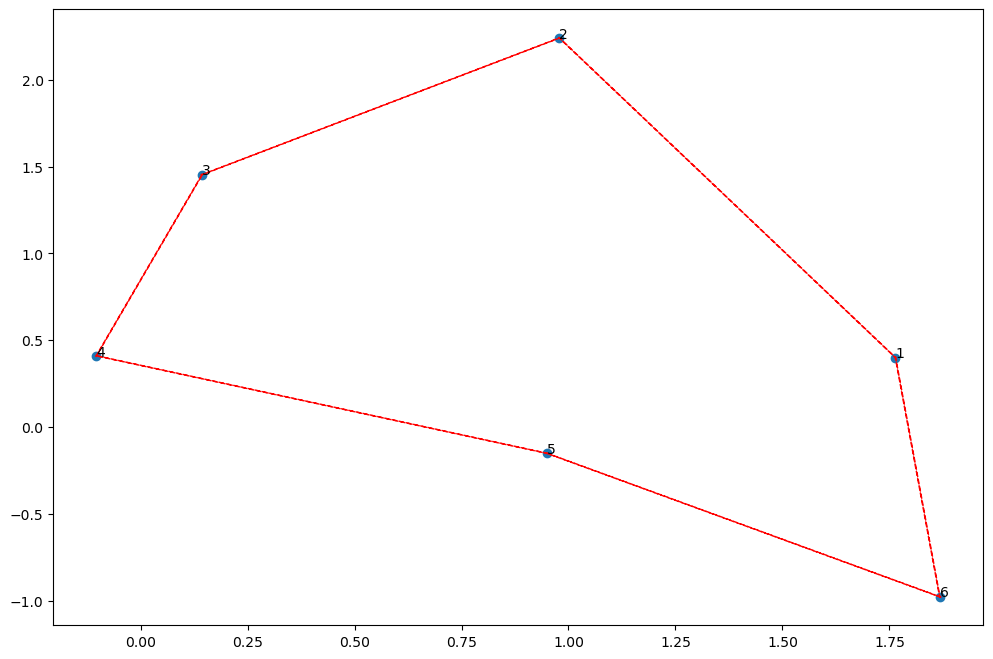

In [18]:
tsp = TSP(coordinates=coords, distance_metric='euclidean')
tsp.solve(verbose=True)
tsp.plot_optimal_tour()

# Traveling Salesperson Problem (TSP) in Graph Theory  

The **Traveling Salesperson Problem (TSP)** can also be described using **graph theory**. The problem can be modeled as a **fully connected, undirected graph** ( G(V, E) ) in its symmetric form.  

Even though **graph theory** does not inherently include the concepts of **position** or **ordering** of vertices, the TSP can still be formulated using only the **transition costs** between towns. In this representation, the set of **edges** \( E \) consists of all possible transitions between vertices, making the graph **complete** (i.e., every pair of vertices is connected by an edge).  

## Graph Representation of the Solution  

A **solution** to the TSP can also be represented as a graph. The **set of vertices** \( V \) remains unchanged, but the **set of edges** ( E* ) must form a **Hamiltonian cycle**—a cycle that:  
1. **Visits each vertex exactly once**  
2. **Returns to the starting vertex**  

The **optimal solution** is the Hamiltonian cycle with the **minimum total cost** among all possible Hamiltonian cycles in the graph. Mathematically, the goal is to find a subset of edges ( E* subset of E ) such that:  

- \( |E*| = |V| \) (Each vertex has exactly two incident edges, forming a cycle)  
- The **degree** of each vertex is exactly **two**, meaning each vertex is connected to exactly
- \( G(V, E*)) is connected and contains no **subtours**  
- The total cost \( sum_{e in E*} ) is minimized  
- The degree of each node is

Since the number of possible Hamiltonian cycles grows **exponentially** with \( |V| \), solving TSP efficiently remains a computational challenge.  
